In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

In [2]:
df_survey = pd.read_csv("Maximus COVID-19 Employee Survey Updated.csv", header=[0,1])
codebook = df_survey.columns.to_frame(index=0, name=['question', 'options'])

In [3]:
df_survey.head()

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,First Name,Last Name,Custom Data 1,What is your job role?,...,What actions or safeguards do you recommend Maximus takes to continue to improve the health and safety of our employees and facilities? (Please select all that apply or None of the Above).,Unnamed: 24_level_0,Unnamed: 25_level_0,Unnamed: 26_level_0,Unnamed: 27_level_0,Please rate the following statements related to working remotely (from home).,Unnamed: 29_level_0,Unnamed: 30_level_0,"In order for an office to be reopened, Maximus requires that each site go through a comprehensive review with corporate leadership to determine a site’s ability to re-open. In addition to this review, each site must implement social distancing, face coverings, routine onsite cleaning, sanitation, decontamination, the Clear2Work health screening assessment, including temperature checks, prior to entering the facility, and other on-site protections. Current information and policies on Health Screening Assessment can be found here: link to Health Screening Assessment Information.Based on these measures, I am comfortable returning to a Maximus office once it re-opens.",How likely is it that you would recommend Maximus to a friend or colleague?
,Unnamed: 0_level_1,Unnamed: 1_level_1,Unnamed: 2_level_1,Unnamed: 3_level_1,Unnamed: 4_level_1,Unnamed: 5_level_1,Unnamed: 6_level_1,Unnamed: 7_level_1,Unnamed: 8_level_1,Response,...,Explore options to expand my access to additional health and safety measures.,Innovate office arrangements such that social distancing becomes more natural.,Keep things as is - current safeguards are sufficient.,None of the above.,Enter any ideas or other options:,Technology and resources were sufficient,Training and support were sufficient to use the resources provided.,My direct supervisor keeps in contact with me while working remotely.,Response,Response
0,1.179883e+10,262756924.0,7/16/2020 14:01,7/16/2020 14:03,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.179883e+10,262756924.0,7/16/2020 14:02,7/16/2020 14:03,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1.179883e+10,262756924.0,7/16/2020 14:00,7/16/2020 14:01,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1.179883e+10,262756924.0,7/16/2020 14:00,7/16/2020 14:03,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,Strongly agree,Agree,Strongly agree,Agree,NaN
4,1.179882e+10,262756924.0,7/16/2020 14:00,7/16/2020 14:00,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df_survey.shape

(9366, 33)

In [5]:
df_survey = pd.read_csv("Maximus COVID-19 Employee Survey Updated.csv", header=None, prefix='Q').iloc[2:]
df_survey.head()

,Q0,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q23,Q24,Q25,Q26,Q27,Q28,Q29,Q30,Q31,Q32
2,11798832567,262756924,7/16/2020 14:01,7/16/2020 14:03,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11798831622,262756924,7/16/2020 14:02,7/16/2020 14:03,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,11798827034,262756924,7/16/2020 14:00,7/16/2020 14:01,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,11798825409,262756924,7/16/2020 14:00,7/16/2020 14:03,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,Strongly agree,Agree,Strongly agree,Agree,NaN
6,11798822787,262756924,7/16/2020 14:00,7/16/2020 14:00,NaN,NaN,NaN,NaN,NaN,Employee (no direct reports),...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df_survey['Q20'].dropna()

5            I have worked primarily remotely (from home)
7       I have worked primarily in a Maximus office/ca...
9            I have worked primarily remotely (from home)
10           I have worked primarily remotely (from home)
11      I have worked primarily in a Maximus office/ca...
                              ...                        
9363    I have worked primarily in a Maximus office/ca...
9364    I have worked primarily in a Maximus office/ca...
9365    I have worked primarily in a Maximus office/ca...
9366    I have worked primarily in a Maximus office/ca...
9367    I have worked primarily in a Maximus office/ca...
Name: Q20, Length: 8958, dtype: object

In [7]:
df_survey['Q20'] = df_survey['Q20'].astype(str)

In [8]:
df_survey = df_survey[~df_survey['Q20'].isin(['nan'])]

In [9]:
temp_series = df_survey['Q20'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Employment Status Distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="employmentstatus")

In [10]:
temp_series = df_survey['Q9'].value_counts()
labels = (np.array(temp_series.index))
sizes = (np.array((temp_series / temp_series.sum())*100))

trace = go.Pie(labels=labels, values=sizes)
layout = go.Layout(
    title='Management Type Distribution'
)
data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="management")

In [11]:
cnt_srs = df_survey['Q15'].value_counts()

trace = go.Scatter(
    x=cnt_srs.index,
    y=cnt_srs.values,
    mode='markers',
    marker=dict(
        sizemode = 'diameter',
        sizeref = 1,
        size = 50,
        #color = np.random.randn(500), #set color equal to a variable
        color = cnt_srs.values,
        colorscale='Portland',
        showscale=True
    ),
)

layout = go.Layout(
    title='Tenure Distribution'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="tenure")

In [12]:
net_promoter_map = {"1":1, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10}
df_survey["Q32_new"] = df_survey["Q32"].map(net_promoter_map)
cnt_srs = df_survey["Q32_new"].value_counts()

trace = go.Bar(
    x=cnt_srs.index,
    y=cnt_srs.values,
    marker=dict(
        color=cnt_srs.values,
        colorscale = 'Rainbow',
        reversescale = True
    ),
)

layout = go.Layout(
    title='How likely is it that you would recommend Maximus to a friend or colleague?'
)

data = [trace]
fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename="PromoterScore")

In [13]:
# Generate a chart to visualize single-answer questions
def gen_chart_radiobutton(data, question_name, index, group_column_name):
    print("Number of answers in each group: ")
    print(data[[question_name, group_column_name]].groupby(group_column_name).count())
    i_counts = (
        data.groupby([group_column_name])[question_name]
        .value_counts(normalize=True)
        .rename("percentage(%)")
        .mul(100)
        .reset_index()
        .round(2)
    )

    listOfGroup = list(data.loc[:,group_column_name].unique())
    listOfGroup.sort()

    fig, ax = plt.subplots(figsize=(10, 8))

    fig = sns.barplot(
        x="percentage(%)",
        y=question_name,
        order=index,
        hue=group_column_name,
        hue_order=listOfGroup,
        data=i_counts,
    )

    plt.title(None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title="group")
    ax.set(xlim=(0, 100))
    ax.set_ylabel("")
    return plt.show()

In [14]:
index = ["Strongly disagree",
        "Disagree",
        "Neither agree nor disagree",
        "Agree",
        "Strongly agree"]

Number of answers in each group: 
                                     Q16
Q13                                     
Corporate/Home Office                481
Federal                             4619
Health/Human Services               2962
Other or Not Sure (please specify)   896


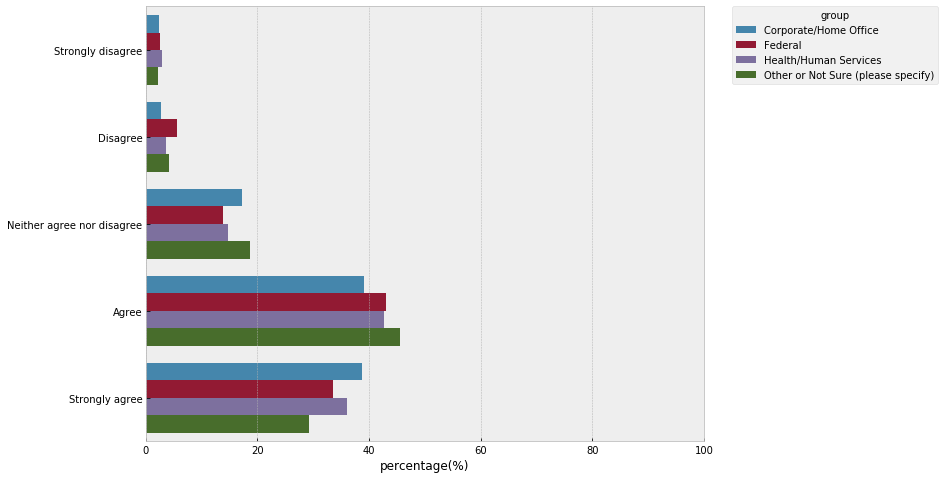

In [15]:
gen_chart_radiobutton(df_survey, "Q16", index, 'Q13')

Number of answers in each group: 
                                     Q16
Q9                                      
Director/Sr.Director                 147
Employee (no direct reports)        6910
Manager/Sr. Manager                  448
Other or Not Sure (please specify)   658
Supervisor                           723
Vice President and above              72


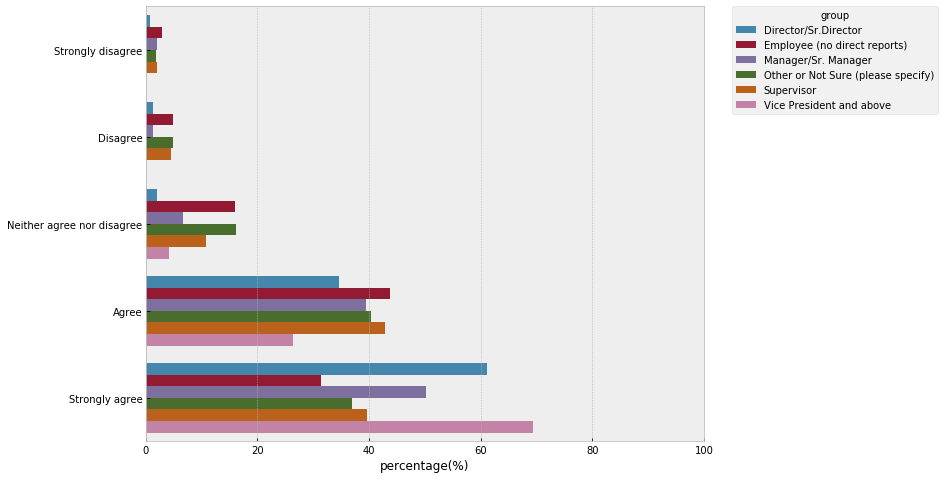

In [16]:
gen_chart_radiobutton(df_survey, "Q16", index, 'Q9')

Number of answers in each group: 
                                                     Q16
Q20                                                     
I have worked primarily in a Maximus office/cal...  3910
I have worked primarily remotely (from home)        5048


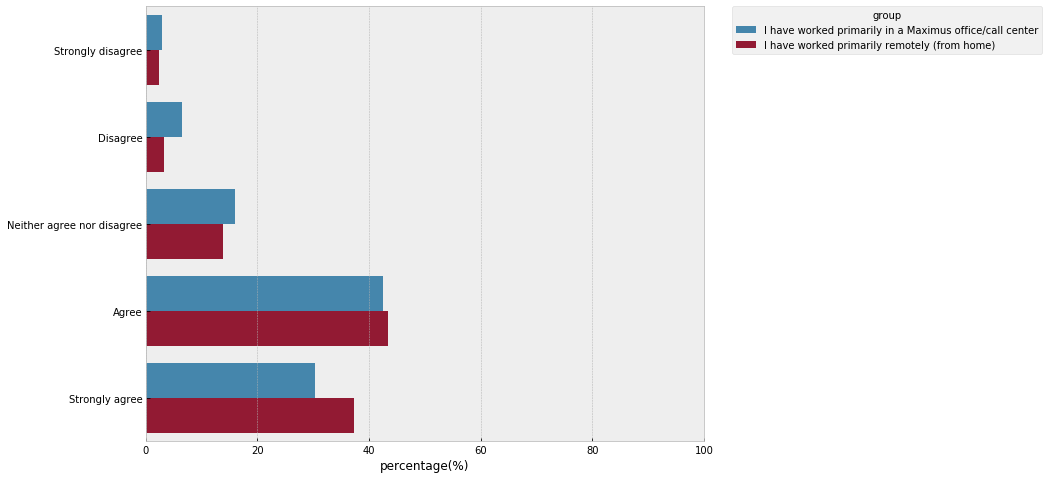

In [17]:
gen_chart_radiobutton(df_survey, "Q16", index, "Q20")

Number of answers in each group: 
                                     Q17
Q13                                     
Corporate/Home Office                481
Federal                             4619
Health/Human Services               2962
Other or Not Sure (please specify)   896


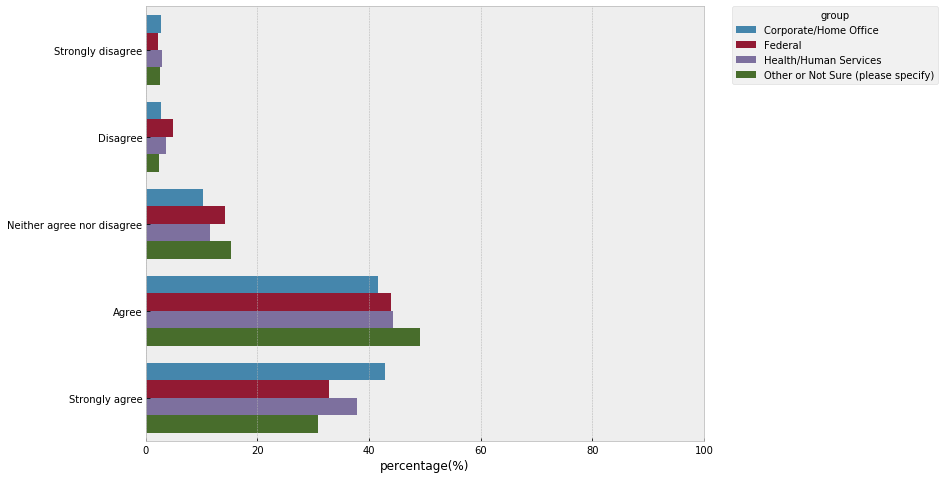

In [18]:
gen_chart_radiobutton(df_survey, "Q17", index, 'Q13')

Number of answers in each group: 
                                     Q17
Q9                                      
Director/Sr.Director                 147
Employee (no direct reports)        6910
Manager/Sr. Manager                  448
Other or Not Sure (please specify)   658
Supervisor                           723
Vice President and above              72


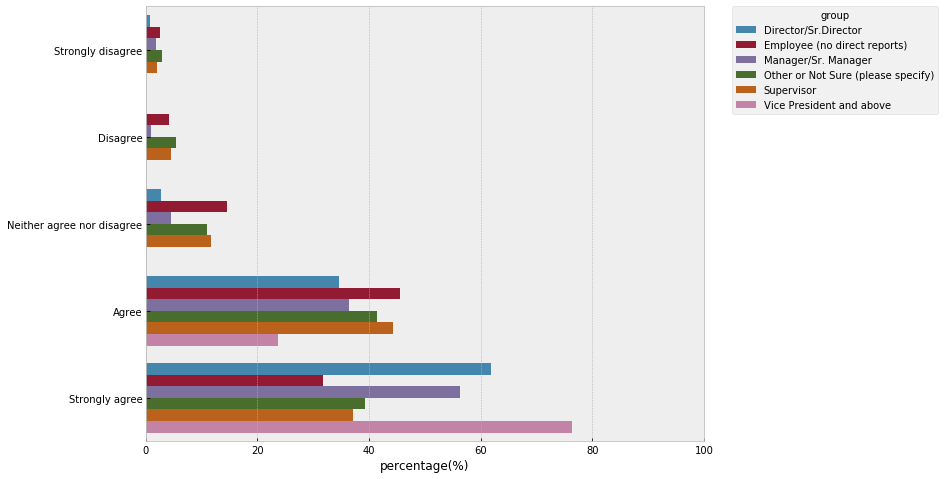

In [19]:
gen_chart_radiobutton(df_survey, "Q17", index, 'Q9')

Number of answers in each group: 
                                                     Q17
Q20                                                     
I have worked primarily in a Maximus office/cal...  3910
I have worked primarily remotely (from home)        5048


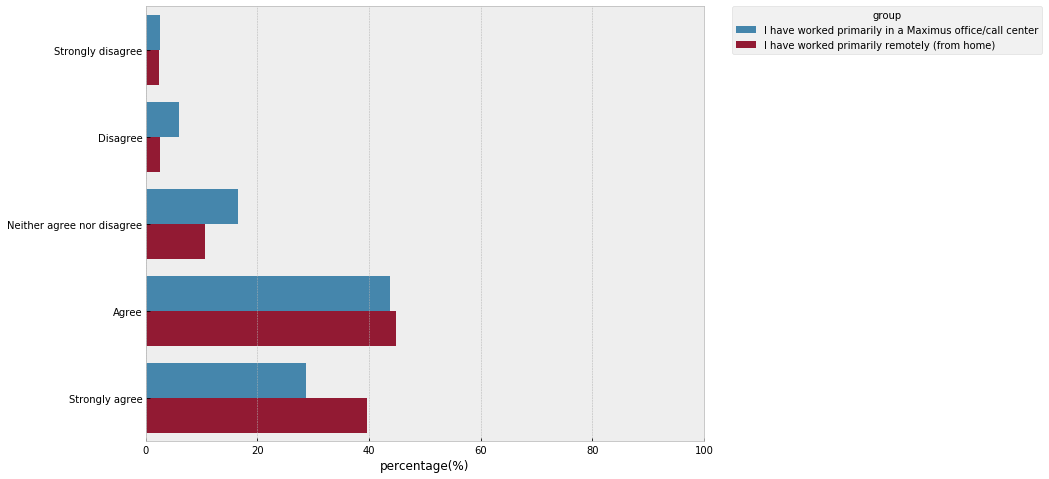

In [20]:
gen_chart_radiobutton(df_survey, "Q17", index, 'Q20')

Number of answers in each group: 
                                     Q18
Q13                                     
Corporate/Home Office                481
Federal                             4619
Health/Human Services               2962
Other or Not Sure (please specify)   896


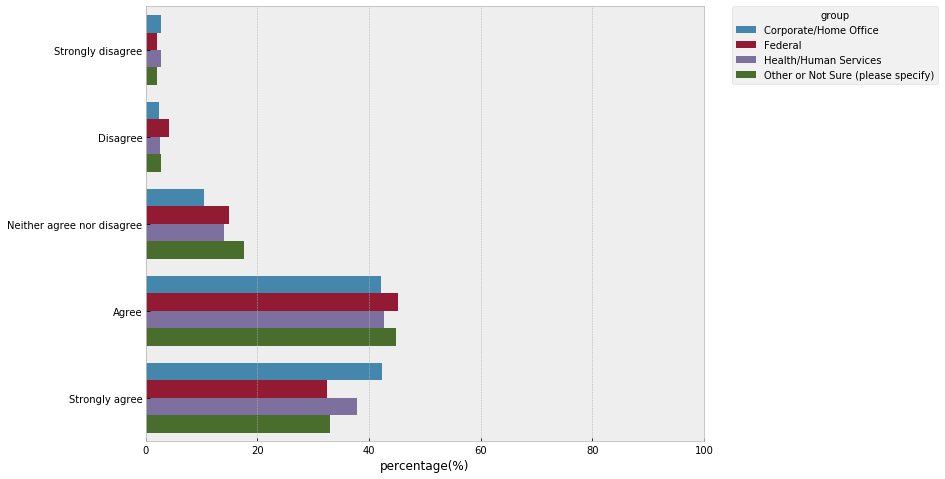

In [21]:
gen_chart_radiobutton(df_survey, "Q18", index, "Q13")

Number of answers in each group: 
                                     Q18
Q9                                      
Director/Sr.Director                 147
Employee (no direct reports)        6910
Manager/Sr. Manager                  448
Other or Not Sure (please specify)   658
Supervisor                           723
Vice President and above              72


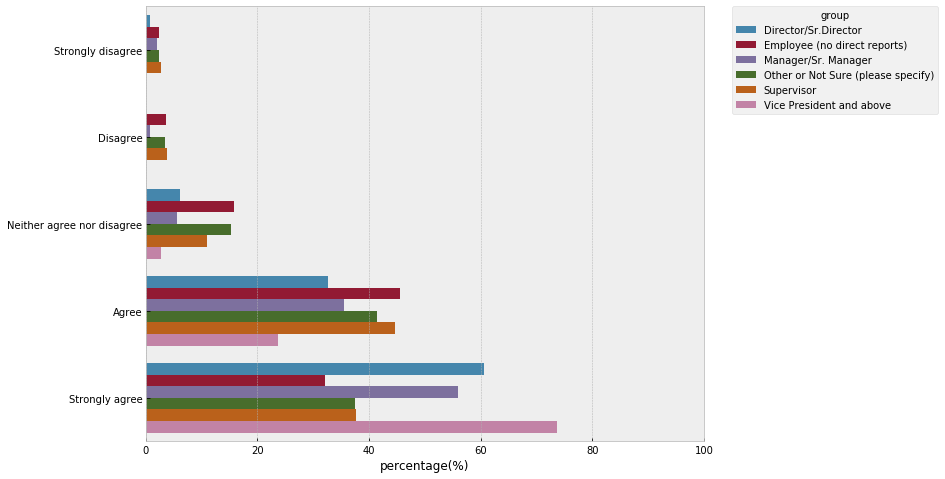

In [22]:
gen_chart_radiobutton(df_survey, "Q18", index, "Q9")

Number of answers in each group: 
                                                     Q18
Q20                                                     
I have worked primarily in a Maximus office/cal...  3910
I have worked primarily remotely (from home)        5048


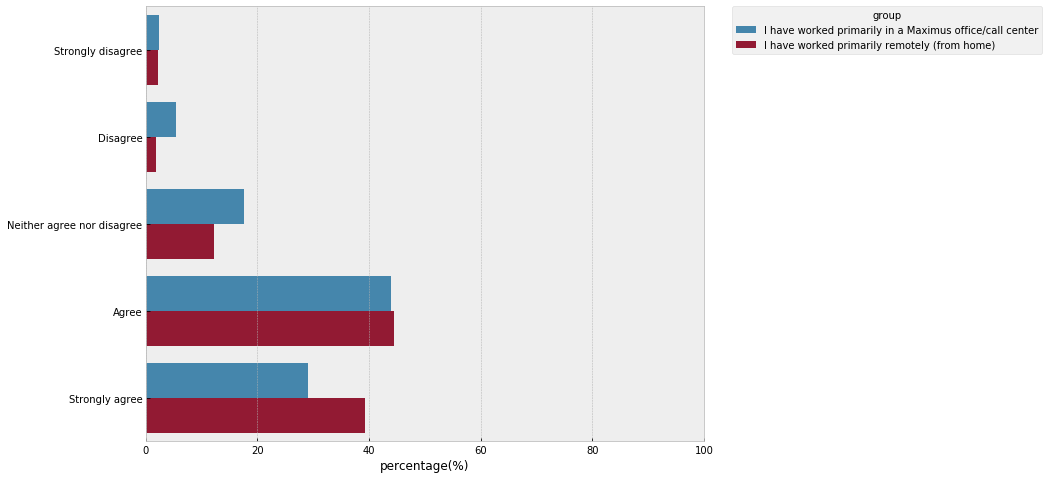

In [23]:
gen_chart_radiobutton(df_survey, "Q18", index, "Q20")

Number of answers in each group: 
                                     Q19
Q13                                     
Corporate/Home Office                481
Federal                             4619
Health/Human Services               2962
Other or Not Sure (please specify)   896


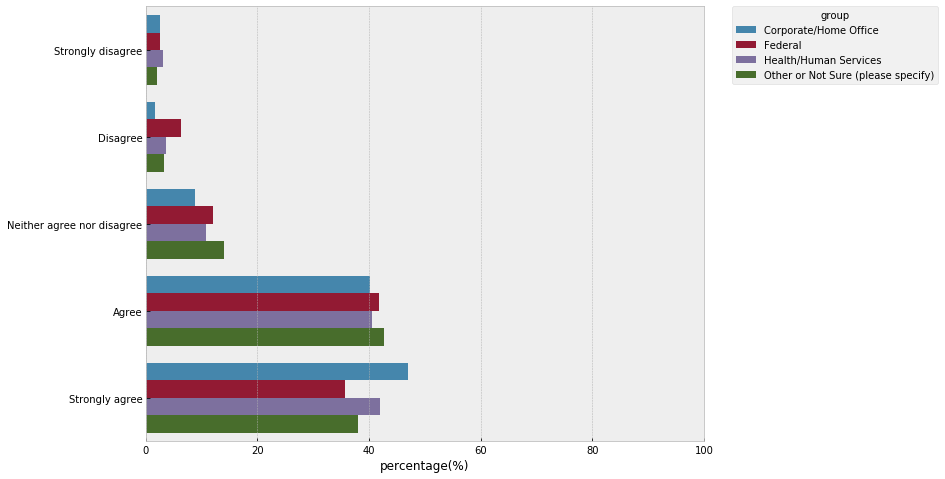

In [24]:
gen_chart_radiobutton(df_survey, "Q19", index, "Q13")

Number of answers in each group: 
                                     Q19
Q9                                      
Director/Sr.Director                 147
Employee (no direct reports)        6910
Manager/Sr. Manager                  448
Other or Not Sure (please specify)   658
Supervisor                           723
Vice President and above              72


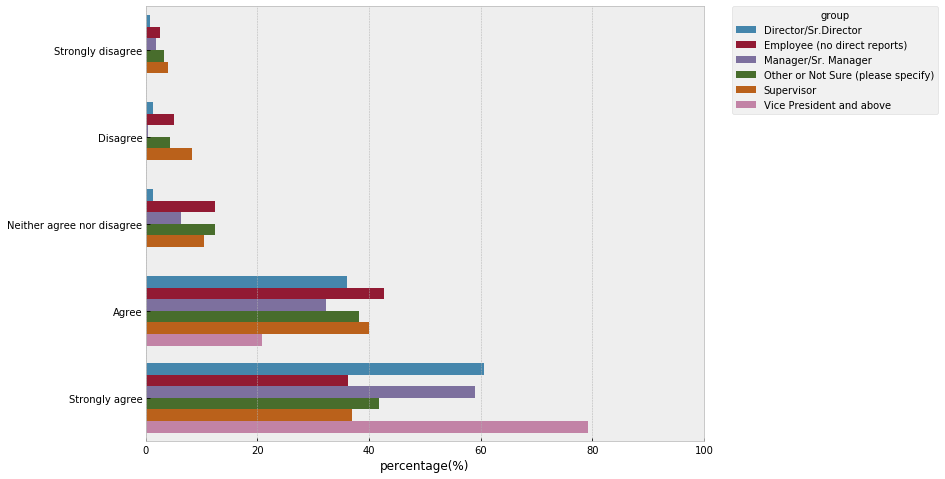

In [25]:
gen_chart_radiobutton(df_survey, "Q19", index, "Q9")

Number of answers in each group: 
                                                     Q19
Q20                                                     
I have worked primarily in a Maximus office/cal...  3910
I have worked primarily remotely (from home)        5048


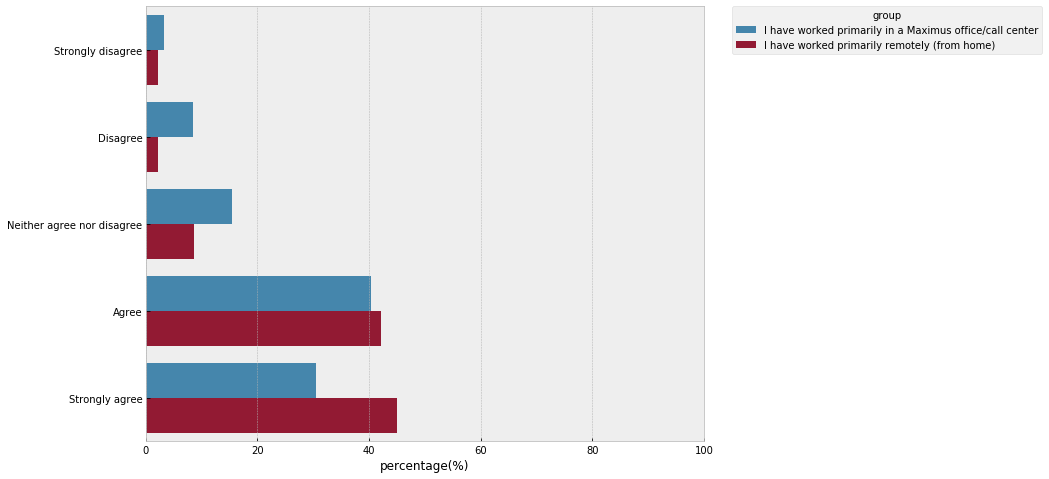

In [26]:
gen_chart_radiobutton(df_survey, "Q19", index, "Q20")

Number of answers in each group: 
                                     Q21
Q13                                     
Corporate/Home Office                 72
Federal                             2534
Health/Human Services                886
Other or Not Sure (please specify)   309


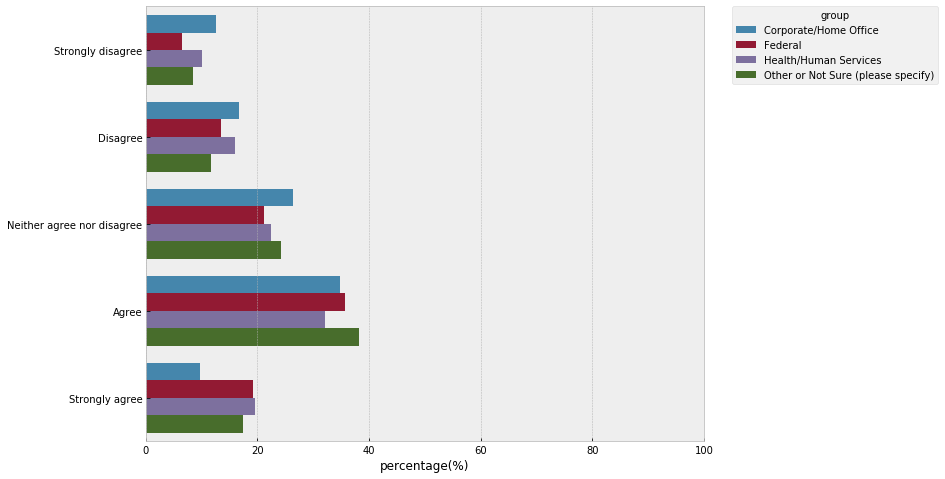

In [27]:
gen_chart_radiobutton(df_survey, "Q21", index, "Q13")

Number of answers in each group: 
                                     Q21
Q9                                      
Director/Sr.Director                   5
Employee (no direct reports)        2880
Manager/Sr. Manager                  131
Other or Not Sure (please specify)   288
Supervisor                           493
Vice President and above               4


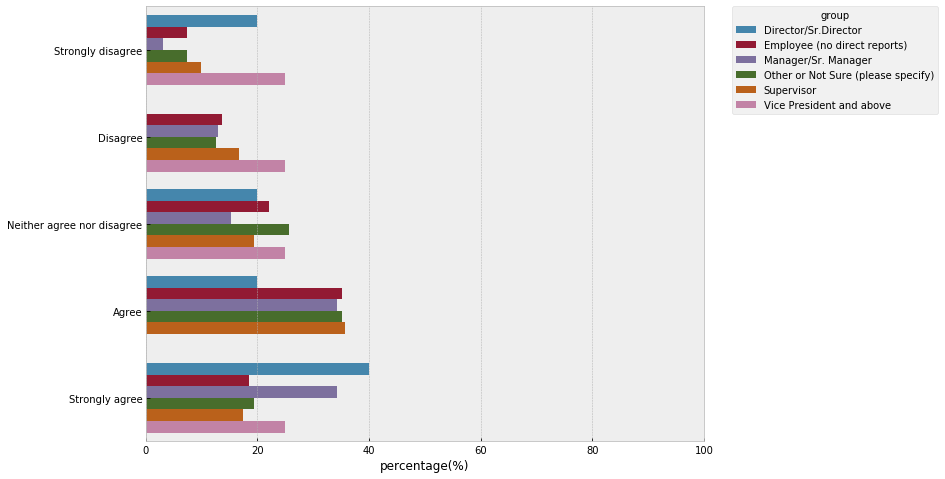

In [28]:
gen_chart_radiobutton(df_survey, "Q21", index, "Q9")

Number of answers in each group: 
                                                     Q21
Q20                                                     
I have worked primarily in a Maximus office/cal...  3797
I have worked primarily remotely (from home)           4


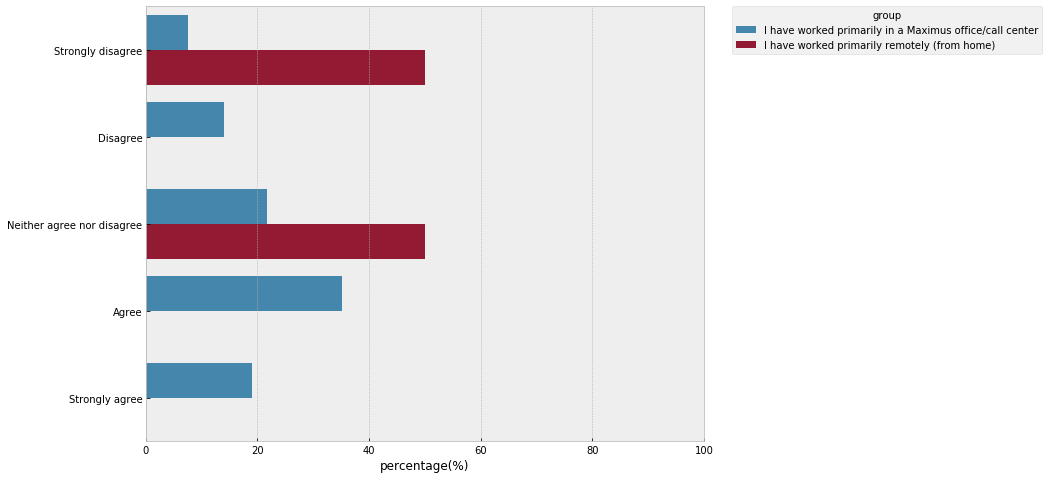

In [29]:
gen_chart_radiobutton(df_survey, "Q21", index, "Q20")

Number of answers in each group: 
                                     Q22
Q13                                     
Corporate/Home Office                 72
Federal                             2521
Health/Human Services                873
Other or Not Sure (please specify)   309


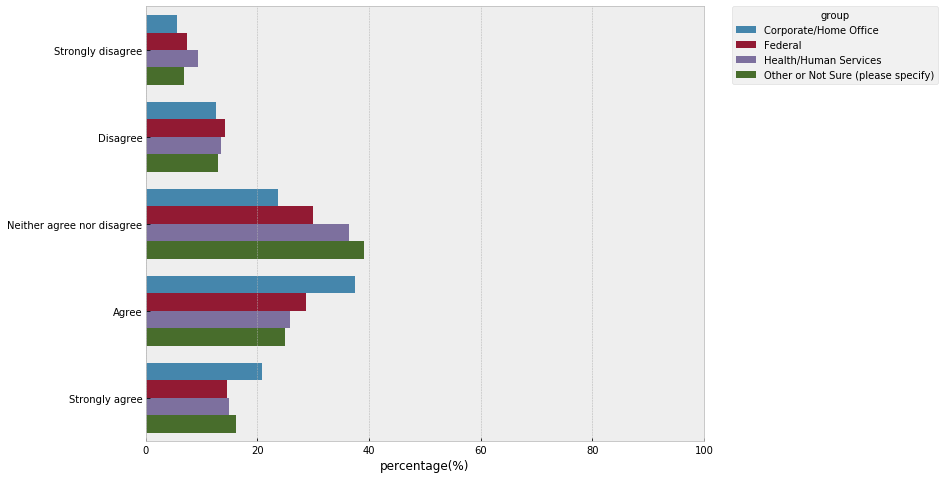

In [55]:
index = ["Strongly disagree",
        "Disagree",
        "Neither agree nor disagree",
        "Agree",
        "Strongly agree"]
gen_chart_radiobutton(df_survey, "Q22", index, "Q13")

Number of answers in each group: 
                                     Q22
Q9                                      
Director/Sr.Director                   5
Employee (no direct reports)        2864
Manager/Sr. Manager                  129
Other or Not Sure (please specify)   285
Supervisor                           488
Vice President and above               4


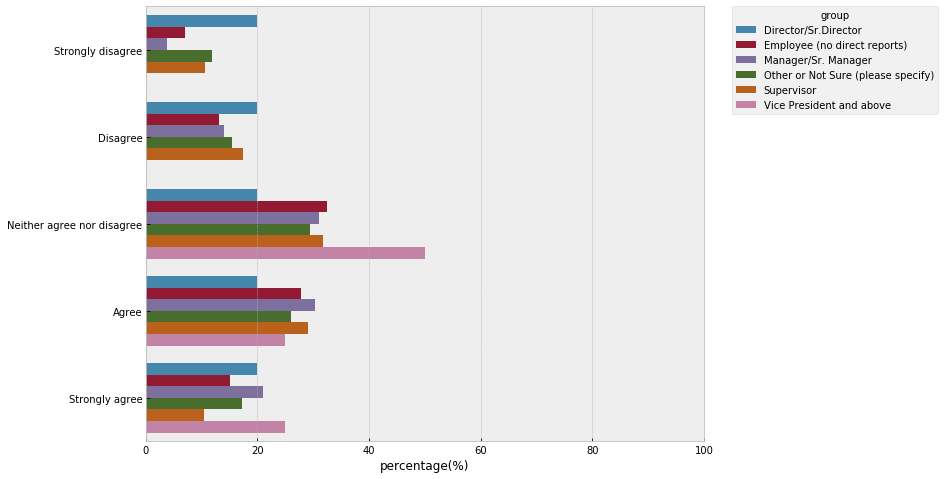

In [56]:
gen_chart_radiobutton(df_survey, "Q22", index, "Q9")

Number of answers in each group: 
                                                     Q22
Q20                                                     
I have worked primarily in a Maximus office/cal...  3772
I have worked primarily remotely (from home)           3


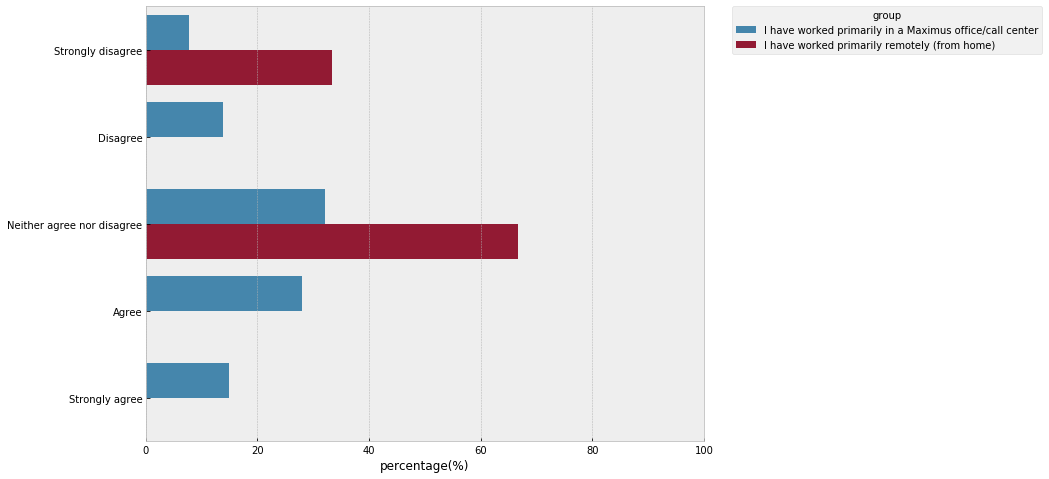

In [57]:
gen_chart_radiobutton(df_survey, "Q22", index, "Q20")

Number of answers in each group: 
                                     Q28
Q13                                     
Corporate/Home Office                394
Federal                             1992
Health/Human Services               1976
Other or Not Sure (please specify)   561


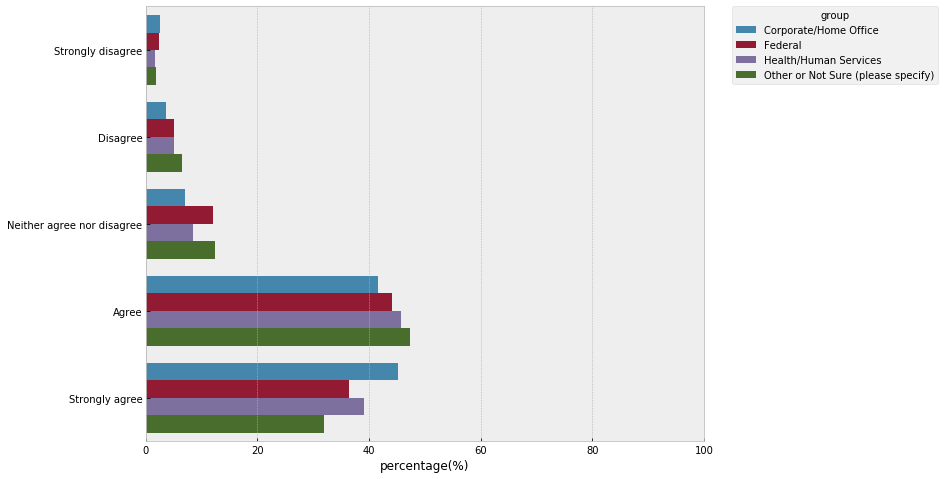

In [62]:
gen_chart_radiobutton(df_survey, "Q28", index, "Q13")

Number of answers in each group: 
                                     Q28
Q9                                      
Director/Sr.Director                 137
Employee (no direct reports)        3862
Manager/Sr. Manager                  301
Other or Not Sure (please specify)   343
Supervisor                           212
Vice President and above              68


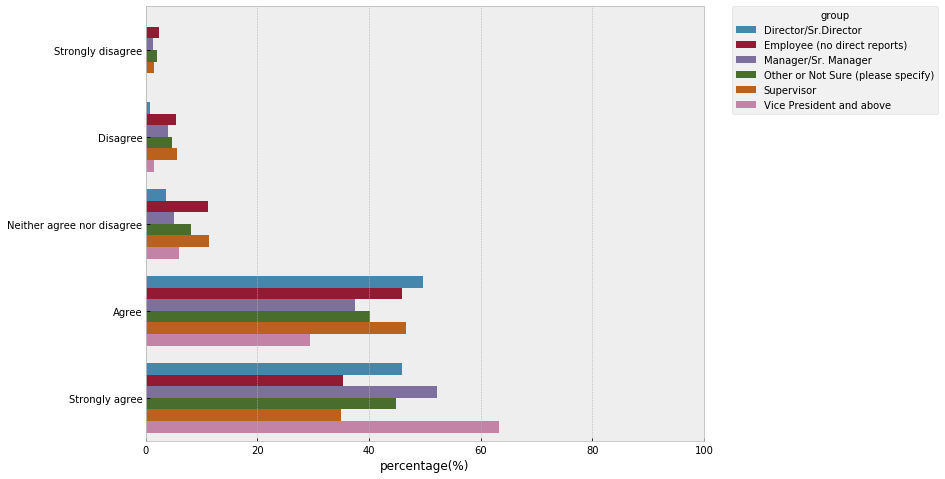

In [63]:
gen_chart_radiobutton(df_survey, "Q28", index, "Q9")

Number of answers in each group: 
                                                     Q28
Q20                                                     
I have worked primarily in a Maximus office/cal...     0
I have worked primarily remotely (from home)        4923


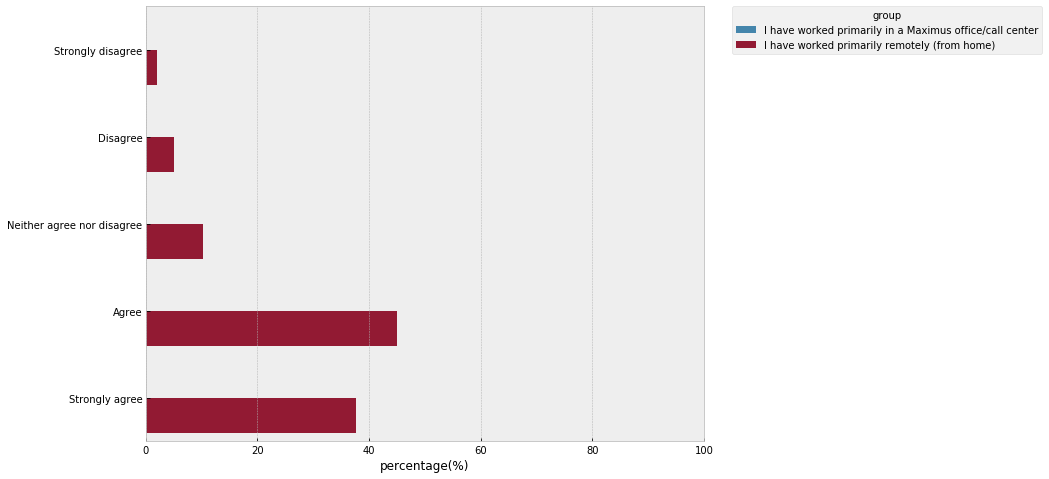

In [61]:
gen_chart_radiobutton(df_survey, "Q28", index, "Q20")

Number of answers in each group: 
                                     Q29
Q13                                     
Corporate/Home Office                393
Federal                             1988
Health/Human Services               1975
Other or Not Sure (please specify)   560


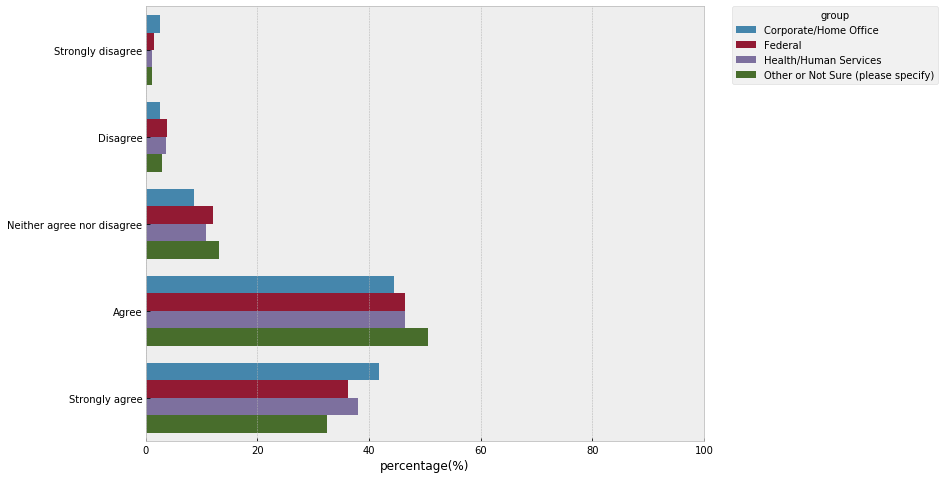

In [64]:
gen_chart_radiobutton(df_survey, "Q29", index, "Q13")

Number of answers in each group: 
                                     Q29
Q9                                      
Director/Sr.Director                 137
Employee (no direct reports)        3855
Manager/Sr. Manager                  301
Other or Not Sure (please specify)   342
Supervisor                           213
Vice President and above              68


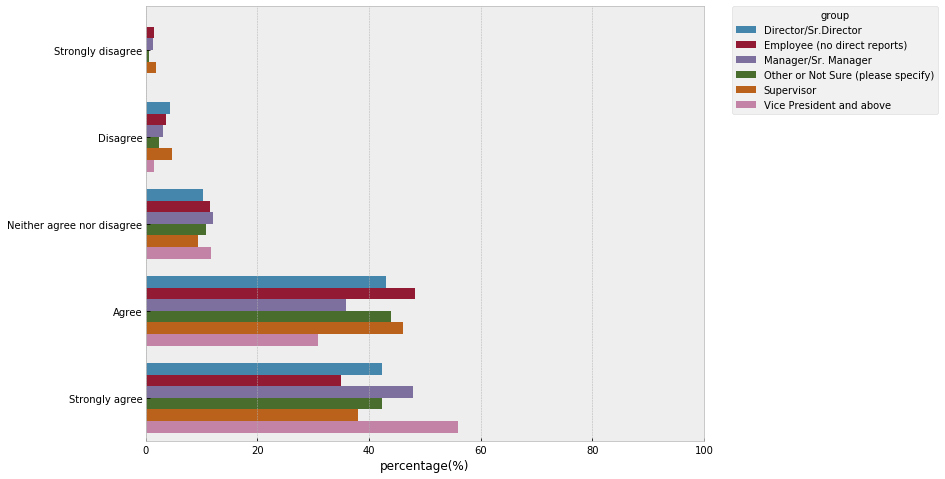

In [65]:
gen_chart_radiobutton(df_survey, "Q29", index, "Q9")

Number of answers in each group: 
                                                     Q29
Q20                                                     
I have worked primarily in a Maximus office/cal...     0
I have worked primarily remotely (from home)        4916


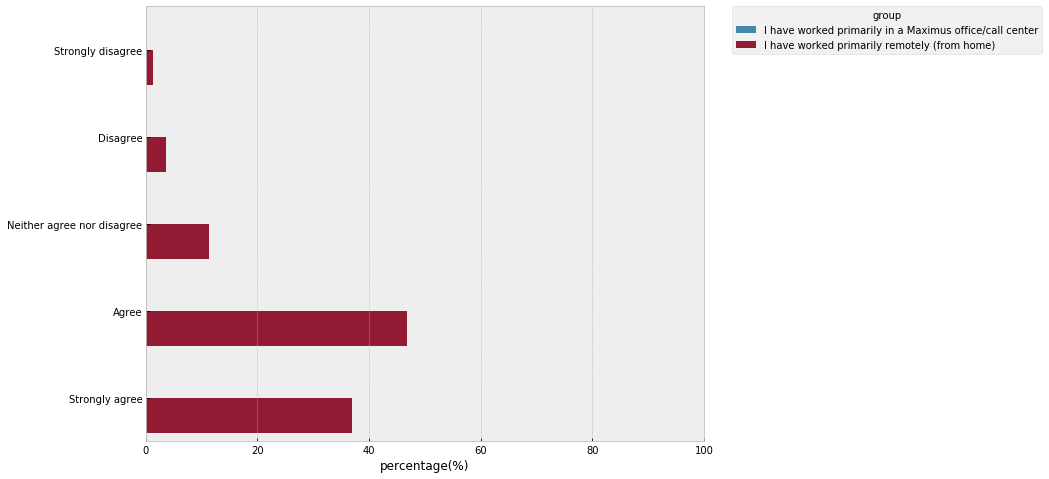

In [66]:
gen_chart_radiobutton(df_survey, "Q29", index, "Q20")

Number of answers in each group: 
                                     Q30
Q13                                     
Corporate/Home Office                391
Federal                             1988
Health/Human Services               1970
Other or Not Sure (please specify)   561


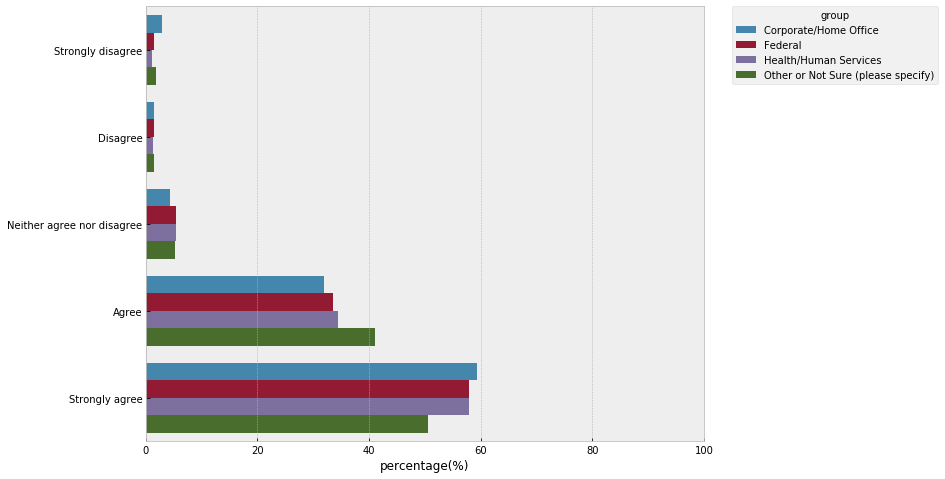

In [67]:
gen_chart_radiobutton(df_survey, "Q30", index, "Q13")

Number of answers in each group: 
                                     Q30
Q9                                      
Director/Sr.Director                 136
Employee (no direct reports)        3851
Manager/Sr. Manager                  301
Other or Not Sure (please specify)   342
Supervisor                           212
Vice President and above              68


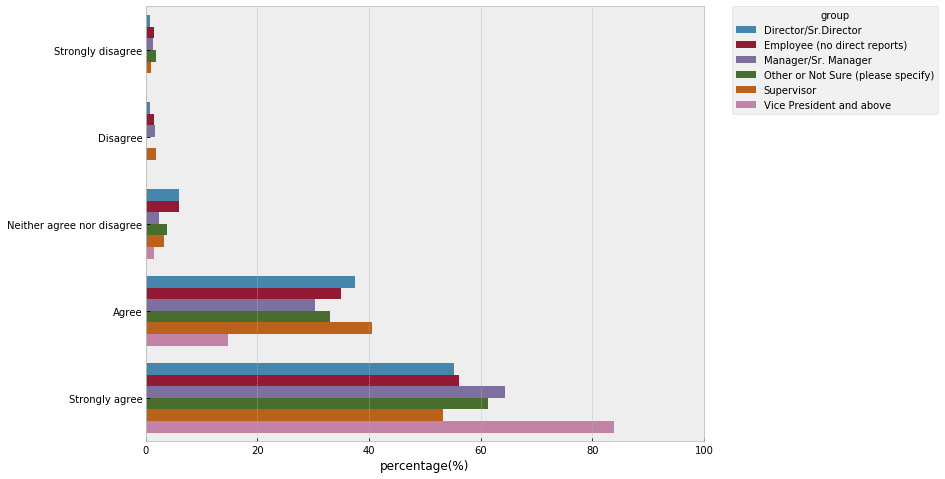

In [68]:
gen_chart_radiobutton(df_survey, "Q30", index, "Q9")

Number of answers in each group: 
                                                     Q30
Q20                                                     
I have worked primarily in a Maximus office/cal...     0
I have worked primarily remotely (from home)        4910


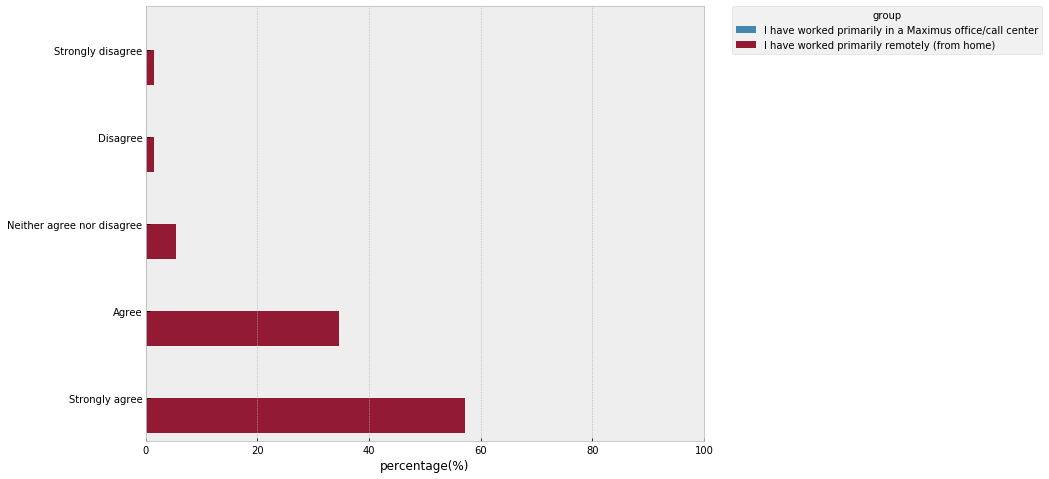

In [69]:
gen_chart_radiobutton(df_survey, "Q30", index, "Q20")

Number of answers in each group: 
                                     Q31
Q13                                     
Corporate/Home Office                394
Federal                             1992
Health/Human Services               1978
Other or Not Sure (please specify)   562


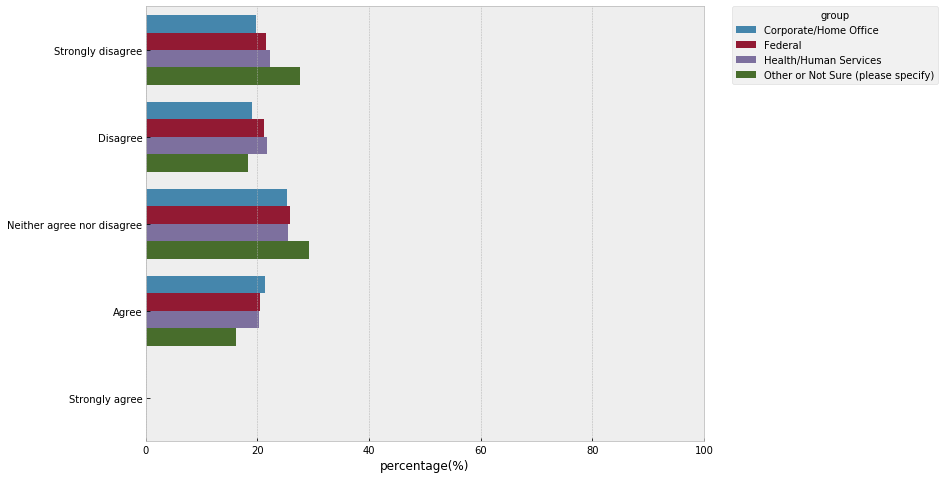

In [70]:
gen_chart_radiobutton(df_survey, "Q31", index, "Q13")

Number of answers in each group: 
                                     Q31
Q9                                      
Director/Sr.Director                 137
Employee (no direct reports)        3864
Manager/Sr. Manager                  301
Other or Not Sure (please specify)   343
Supervisor                           213
Vice President and above              68


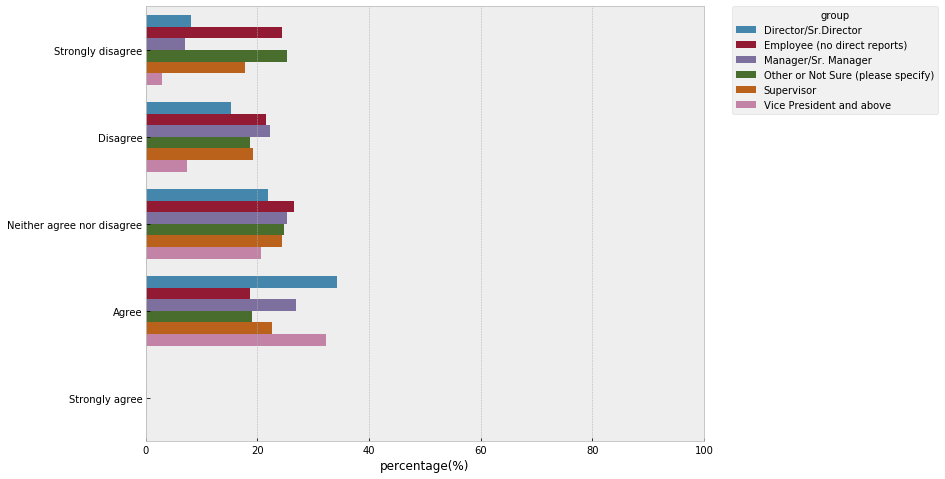

In [81]:
gen_chart_radiobutton(df_survey, "Q31", index, "Q9")

Number of answers in each group: 
                                                     Q31
Q20                                                     
I have worked primarily in a Maximus office/cal...     0
I have worked primarily remotely (from home)        4926


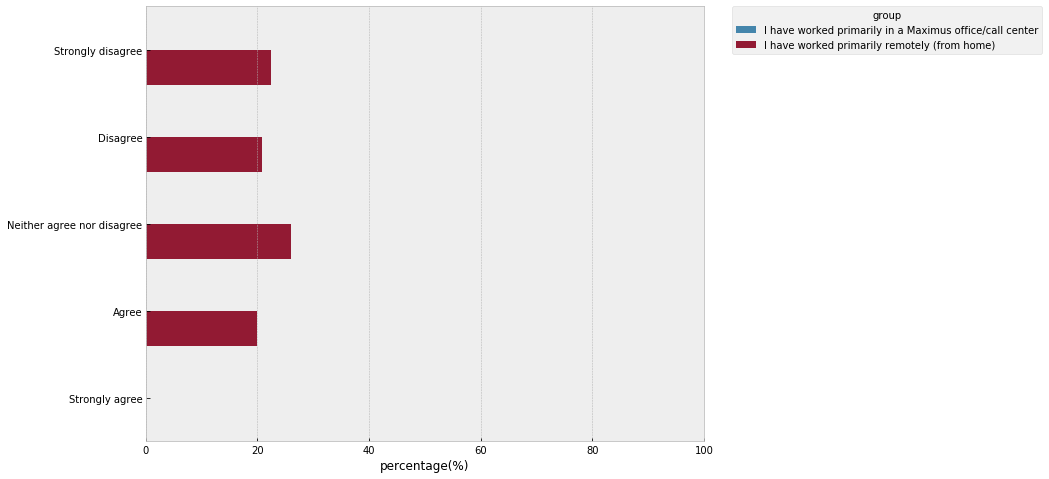

In [72]:
gen_chart_radiobutton(df_survey, "Q31", index, "Q20")

In [40]:
def gen_table(data, group_name, col_range, group_column_name='Q13'):
    data_sub = data[data[group_column_name] == group_name].iloc[:, col_range].dropna(how="all")
    for var in data_sub.columns:
        data_sub[var] = data_sub[var].map(
            {
                "Strongly agree": 5,
                "Agree": 4,
                "Undecided": 3,
                "Disagree": 2,
                "Strongly disagree": 1,
            }
        )
    table = data_sub.describe().loc[["mean", "std", "count"]].T

    index = []

    for var in table.index:
        i = int(var[1:])
        index.append(codebook.iloc[i, 1])

    table["item"] = index

    # table["item_n"] = range(len(index),0,-1)
    table["item_n"] = range(0, len(index))
    return table

# Generate a chart to compare the importance of missing features across two groups
def compare_importance(data, groups, col_range, group_column_name='Q13'):

    group_name_to_describe_data = {}

    #Create a dictionary to save the summary data for each group
    for i, group_name in enumerate(groups):
        group_name_to_describe_data[group_name] = "data_describe_%s" % i

    for group_name in groups:
        table = gen_table(data, group_name, col_range, group_column_name)
        group_name_to_describe_data[group_name] = table

    #Get the item list and index
    items = table.item.tolist()
    item_n = table.item_n.tolist()
    
    # Visualize the mean value with the 95% confidence interval
    # Change the figsize if you have more yticks
    plt.figure(num=None, figsize=(10, 8), dpi=90, facecolor="w", edgecolor="k")
    ax = plt.axes()

    for i, group_name in enumerate(groups):
        plt.errorbar(
            group_name_to_describe_data[group_name]["mean"].astype(float),
            group_name_to_describe_data[group_name]["item_n"] - 0.1 * i,
            xerr=1.96
            * (
                group_name_to_describe_data[group_name]["std"].astype(float)
                / (group_name_to_describe_data[group_name]["count"] ** 0.5)
            ),
            fmt="o",
            elinewidth=1,
            capsize=4,
            marker="o",
            ms=4,
            label=group_name,
        )

    ax.set_xlim(1, 5)
    
    ax.set_yticks(item_n)
    ax.set_yticklabels(labels=items, fontdict={'fontsize':8})

    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title="group")
    plt.title("Compare the mean values across groups (scale 1-5)", fontsize=15)

    return plt.show()

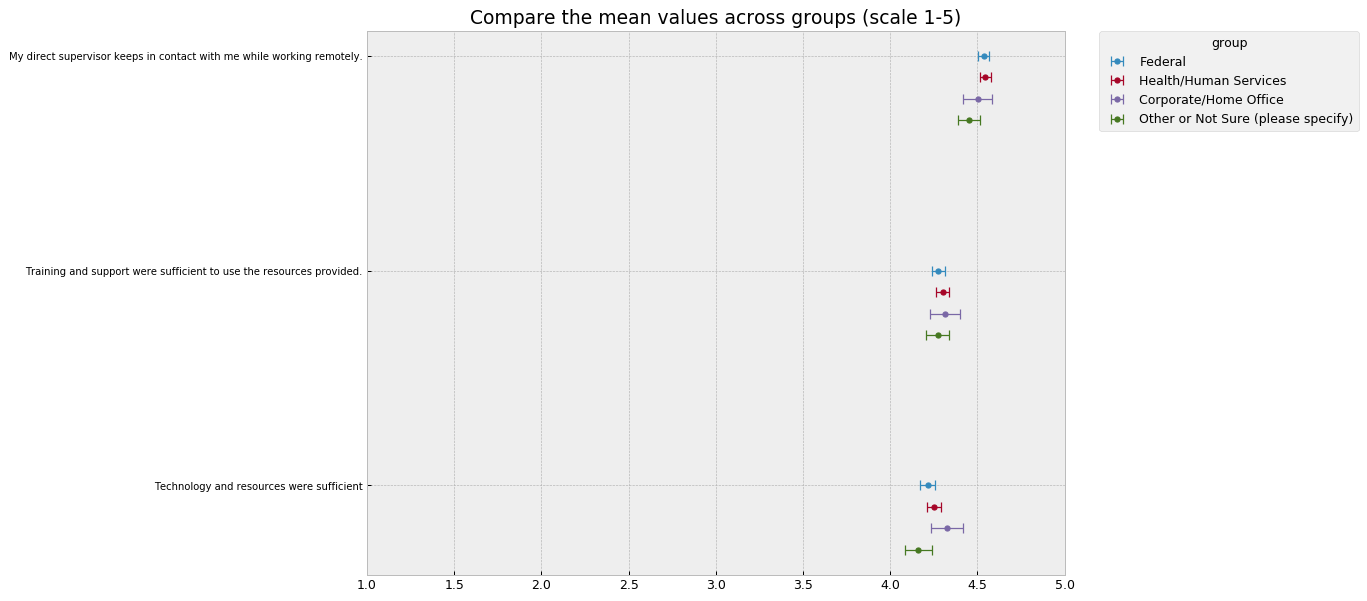

In [41]:
compare_importance(df_survey, ['Federal', 
                               'Health/Human Services', 
                               'Corporate/Home Office', 
                              'Other or Not Sure (please specify)'], range(28,31))

In [42]:
# other questions by business segment
# limit with largest population (employees/supervisors) - by business segment
# questions with remote/not remote groups
# sentiment analysis within python - similar to R script (NLTK package)

In [43]:
# Net promoter score - group by 0-6 (detractor); 7-8 (passive); 9-10 (promoter)
# total promoters - detractors / (total respondents) * 100 = score

# score for business groups
# score for remote/non-remote

In [44]:
def net_promoter_score(rating):
    rating = int(rating)

    if rating < 7:
        bucket = 'Detractor'
    
    if rating in range(7, 9):
        bucket = 'Passive'
      
    if rating in range(9, 11):
        bucket = 'Promoter'
   
    return bucket

In [45]:
df_survey = df_survey[df_survey['Q32'].notna()]
df_survey['Q32'].head()

7      7
9     10
10     7
11    10
12    10
Name: Q32, dtype: object

In [46]:
df_survey['NPS'] = df_survey['Q32'].apply(net_promoter_score)
df_survey['NPS'].head(3)

7      Passive
9     Promoter
10     Passive
Name: NPS, dtype: object

In [75]:
# Generate a chart to visualize single-answer questions
def gen_chart_radiobutton(data, question_name, category, group_column_name):
    print("Number of answers in each group: ")
    print(data[[question_name, group_column_name]].groupby(group_column_name).count())
    i_counts = (
        data.groupby([group_column_name])[question_name]
        .value_counts(normalize=True)
        .rename("percentage(%)")
        .mul(100)
        .reset_index()
        .round(2)
    )

    listOfGroup = list(data.loc[:,group_column_name].unique())
    listOfGroup.sort()

    fig, ax = plt.subplots(figsize=(10, 8))

    fig = sns.barplot(
        x="percentage(%)",
        y=question_name,
        order=category,
        hue=group_column_name,
        hue_order=listOfGroup,
        data=i_counts,
    )

    plt.title(None)
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.0, title="group")
    ax.set(xlim=(0, 100))
    ax.set_ylabel("")
    return plt.show()

In [76]:
category = ["Detractor",
        "Passive",
        "Promoter"]

Number of answers in each group: 
                                                     NPS
Q20                                                     
I have worked primarily in a Maximus office/cal...  3772
I have worked primarily remotely (from home)        4926


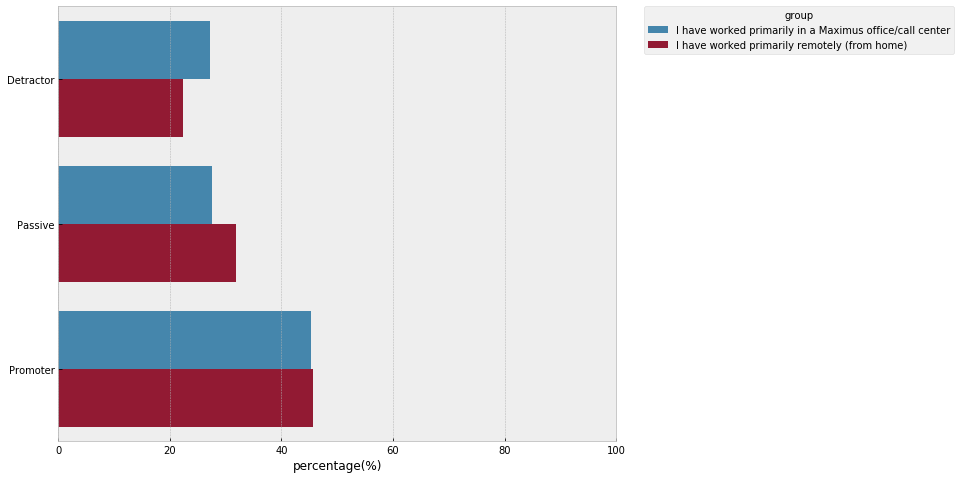

In [77]:
gen_chart_radiobutton(df_survey, "NPS", category, "Q20")

Number of answers in each group: 
                                     NPS
Q13                                     
Corporate/Home Office                466
Federal                             4512
Health/Human Services               2849
Other or Not Sure (please specify)   871


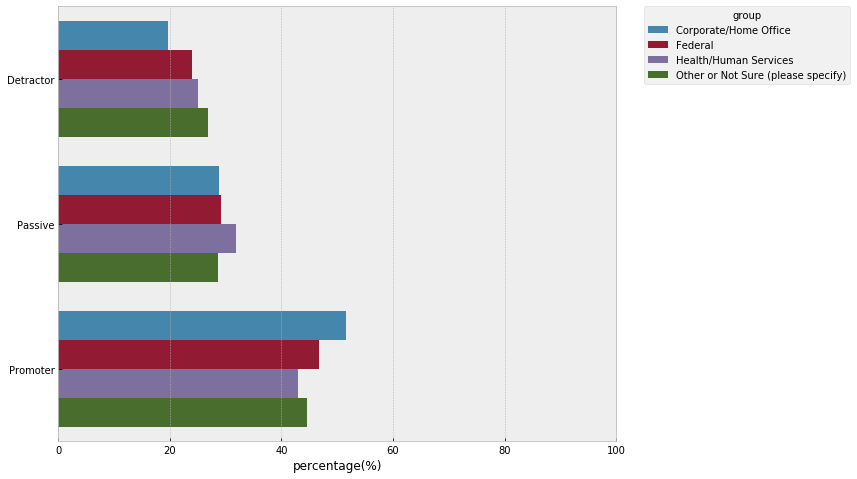

In [78]:
gen_chart_radiobutton(df_survey, "NPS", category, "Q13")

Number of answers in each group: 
                                     NPS
Q9                                      
Director/Sr.Director                 142
Employee (no direct reports)        6725
Manager/Sr. Manager                  430
Other or Not Sure (please specify)   628
Supervisor                           701
Vice President and above              72


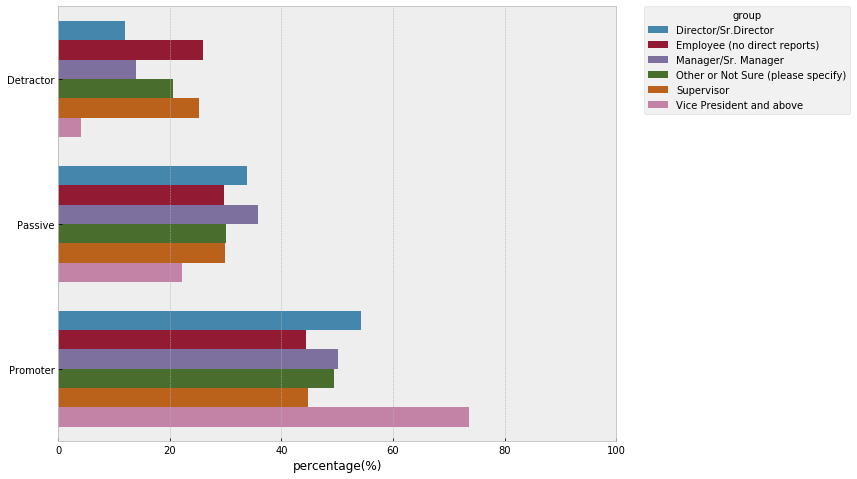

In [79]:
gen_chart_radiobutton(df_survey, "NPS", category, "Q9")